## Genetic Algorithm
_________
#### The Genetic Algorithm(GA) is an evolutionary algorithm(EA) inspired by Charles Darwin’s theory of natural selection which espouses Survival of the fittest. As per the natural selection theory, the fittest individuals are selected to produce offsprings. The fittest parents' characteristics are then passed on to their offsprings using cross-over and mutation to ensure better chances of survival. Genetic algorithms are randomized search algorithms that generate high-quality optimization solutions by imitating the biologically inspired natural selection process such as selection, cross-over, and mutation.

### Terminology for Genetic Algorithm
![](https://miro.medium.com/max/695/1*vIrsxg12DSltpdWoO561yA.png)
#### **Population** contains a set of possible solutions for the stochastic search process to begin. GA will iterate over multiple generations till it finds an acceptable and optimized solution. First-generation is randomly generated.
#### **Chromosome** represents one candidate solution present in the generation or population. A chromosome is also referred to as a Genotype. A chromosome is composed of Genes that contain the value for the optimal variables.
#### **Phenotype** is the decoded parameter list for the genotype that is processed by the Genetic Algorithm. Mapping is applied to the genotype to convert to a phenotype.
#### The **Fitness function** or the objective function evaluates the individual solution or phenotypes for every generation to identify the fittest members.
__________
### Different Genetic Operators
#### **Selection** is the process of selecting the fittest solution from a population, and then the fittest solutions act as parents of the next generation of solutions. This allows the next generation to inherit the strong features naturally. Selection can be performed using Roulette Wheel Selection or **Ranked Selection** based on the fitness value.

#### **Cross-over** or recombination happens when genes from the two fittest parents are randomly exchanged to form a new genotype or solution. Cross over can be a One-point cross over or Multi-Point Cross over based on the parent's segments of genes exchanged.
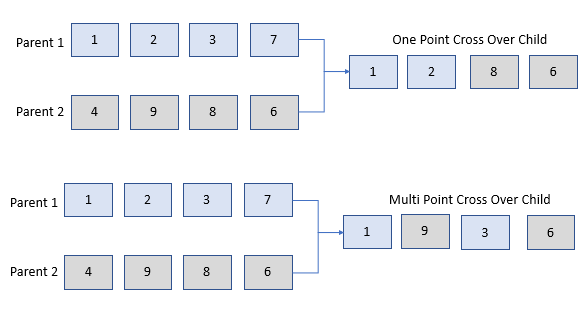
#### Here **One-point Cross-over** is used.
#### After a new population is created through selection and crossover, it is randomly modified through **mutation**. A **mutation** is a process to modify a genotype using a random process to promote diversity in the population to find better and optimized solutions.
![](https://miro.medium.com/max/385/1*bk6zF_rpgGi8IcPIY6fCWg.png)
______
### Usage of Genetic Algorithm in Artificial Intelligence
#### A Genetic Algorithm is used for Search and Optimization using an iterative process to arrive at the best solution out of multiple solutions.
#### 1. A Genetic Algorithm can find an appropriate set of hyperparameters and their values for a deep learning model to increase its performance in Deep Learning.
#### 2. A Genetic Algorithm can also be used to determine the best amount of features to include in a machine learning model for predicting the target variable.
____

### Working of Genetic Algorithm
![](https://miro.medium.com/max/598/1*TZ840m0DvghL80GodVGLeQ.png)
____

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

def split_data(df, label):
    X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.25, random_state=42)
    return X_train, X_test, y_train, y_test

regressors = ['Linear Regression', 'Random Forest', 'AdaBoost', 'Decision Tree', 'KNeighbors', 'Gradient Boosting']

models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=200, random_state=0),
    AdaBoostRegressor(random_state=0),
    DecisionTreeRegressor(random_state=0),
    KNeighborsRegressor(),
    GradientBoostingRegressor(random_state=0)
]

def r2_score_regression(df, label):
    scores = pd.DataFrame({"Regressor": regressors})
    r2_scores = []
    X_train, X_test, y_train, y_test = split_data(df, label)
    
    for model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        r2_scores.append(r2_score(y_test, predictions))
    
    scores["R2 Score"] = r2_scores
    scores.sort_values(by="R2 Score", ascending=False, inplace=True)
    scores.reset_index(drop=True, inplace=True)
    
    return scores

def plot(scores, lower_lim, upper_lim, color="b"):
    generations = [1, 2, 3, 4, 5]
    plt.figure(figsize=(6, 4))
    ax = sns.pointplot(x=generations, y=scores, color=color)
    ax.set(xlabel="Generation", ylabel="R2 Score")
    ax.set(ylim=(lower_lim, upper_lim))


In [2]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)     
        chromosome[:int(0.3*n_feat)]=False             
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population


def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train.iloc[:,chromosome],Y_train)         
        predictions = logmodel.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(Y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)                                    
    return list(scores[inds][::-1]), list(population[inds,:][::-1]) 


def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen


def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen


def mutation(pop_after_cross,mutation_rate,n_feat):   
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = [] 
        for i in range(0,mutation_range):
            pos = randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]  
        pop_next_gen.append(chromo)
    return pop_next_gen

def generations(df, label, size, n_feat, n_parents, mutation_rate, n_gen, X_train, X_test, Y_train, Y_test):
    best_chromo = []
    best_score = []
    selected_features = []
    population_nextgen = initilization_of_population(size, n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation', i + 1, ':', scores[:1])
        pop_after_sel = selection(pop_after_fit, n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross, mutation_rate, n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
        selected_features.append(list(df.columns[pop_after_fit[0]]))
    return best_chromo, best_score, selected_features



____
### Function Description
#### 1. split():
Splits the dataset into training and test set.
#### 2. acc_score():
Returns accuracy for all the classifiers.
#### 3. plot():
For plotting the results.
_____
### Function Description for Genetic Algorithm
#### 1. initilization_of_population():
To initialize a random population.
#### 2. fitness_score():
Returns the best parents along with their score.
#### 3. selection():
Selection of the best parents.
#### 4. crossover():
Picks half of the first parent and half of the second parent.
#### 5. mutation():
Randomly flips selected bits from the crossover child.
#### 6. generations():
Executes all the above functions for the specified number of generations
____
### The following 3 dataset is used:


- Parkinson's Disease

_____
### Plan of action:

* Looking at dataset (includes a little preprocessing)
* Checking Accuracy (comparing accuracies with the new dataset)
* Getting the Features (Important features)
* Visualization (Plotting the graphs)
____

## Implementation of Genetic Algorithm for Feature Selection
________
#### First, we run a function to initialize a random population.
#### The randomized population is now run through the fitness function, which returns the best parents (highest accuracy).
#### Selection from these best parents will occur depending on the n-parent parameter.
#### After doing the same, it will be put through the crossover and mutation functions respectively.
#### Cross over is created by combining genes from the two fittest parents by randomly picking a part of the first parent and a part of the second parent.
#### The mutation is achieved by randomly flipping selected bits for the crossover child.
#### A new generation is created by selecting the fittest parents from the previous generation and applying cross-over and mutation.
#### This process is repeated for n number of generations.
______

# Boston Housing

### 1. Looking at dataset

In [3]:
data_pd = pd.read_csv('Boston Housing.csv')
label_pd = data_pd["MEDV"]
data_pd.drop(["MEDV"],axis = 1,inplace = True)

print("Housing dataset:\n",data_pd.shape[0],"Records\n",data_pd.shape[1],"Features")

Housing dataset:
 506 Records
 13 Features


In [4]:
display(data_pd.head())
print("All the features in this dataset have continuous values")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


All the features in this dataset have continuous values


### 2. Checking Accuracy

In [5]:
score3 = acc_score(data_pd,label_pd)
score3

NameError: name 'acc_score' is not defined

In [ ]:
logmodel = RandomForestClassifier(random_state=0)
X_train, X_test, Y_train, Y_test = split(data_pd, label_pd)
chromo_df_pd, score_pd, selected_features_pd = generations(data_pd, label_pd, size=80, n_feat=data_pd.shape[1], n_parents=64, mutation_rate=0.20, n_gen=5,
                                     X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)

### 3. Getting the Features

In [23]:
# Get the selected features from the last generation
selected_features_final = selected_features_pd[-1]
print("Selected features from the last generation:", selected_features_final)


Selected features from the last generation: ['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'Shimmer:APQ5', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'PPE']


In [29]:
selected_features_final = ['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'Shimmer:APQ5', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'PPE']
feature_mask = [1 if feature in selected_features_final else 0 for feature in data_pd.columns]

feature_table = pd.DataFrame({'Features': data_pd.columns, 'Selected_Status': feature_mask})

# Display feature table
print("Feature Table:")
print(feature_table.to_string(index=False))
#print("Feature Table:")

Feature Table:
        Features  Selected_Status
     MDVP:Fo(Hz)                0
    MDVP:Fhi(Hz)                0
    MDVP:Flo(Hz)                0
  MDVP:Jitter(%)                1
MDVP:Jitter(Abs)                1
        MDVP:RAP                1
        MDVP:PPQ                1
      Jitter:DDP                1
    MDVP:Shimmer                0
MDVP:Shimmer(dB)                0
    Shimmer:APQ3                0
    Shimmer:APQ5                1
        MDVP:APQ                0
     Shimmer:DDA                1
             NHR                1
             HNR                1
            RPDE                1
             DFA                1
         spread1                1
         spread2                0
              D2                0
             PPE                1


### 4. Visualization

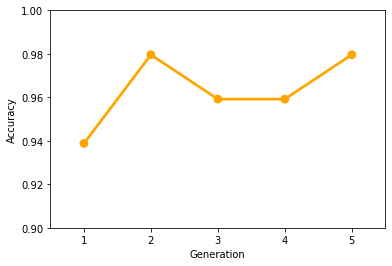

In [12]:
plot(score_pd,0.9,1.0,c = "orange")